In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as ss
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode"

%matplotlib inline

In [2]:
# Data preprocessing
pd.set_option("display.max_rows",100)
data = pd.read_csv("wines.csv",sep=',')
wines_df = data.drop("Unnamed: 0",axis=1)

wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   name                   92507 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [3]:
# Check for missing data - which there are...
wines_df.isnull().sum()

country                     63
description                  0
name                     37464
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [4]:
# Checking and filling missing data. "Points" column doesnt have any missing value.
wines_df['price'] = wines_df['price'].fillna(np.mean(wines_df['price']))

# Droppping rows of categorical/object variables with mising values.
for cols in wines_df.columns:
    wines_df.dropna(subset=[cols],inplace=True)

wines_df.isnull().sum()

country                  0
description              0
name                     0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

In [5]:
# Create a third column which will merge region_1 and region_2.
wines_df[['winery','variety']].nunique()

winery     2796
variety     184
dtype: int64

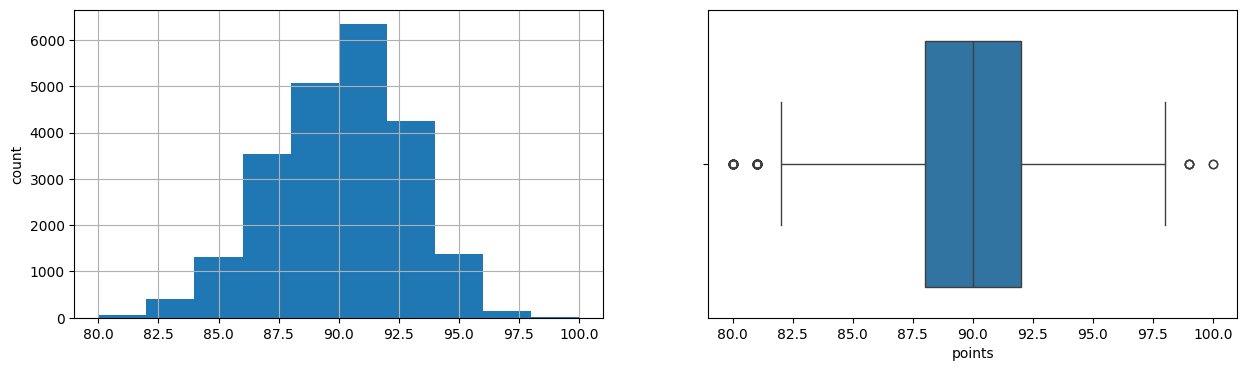

<Figure size 640x480 with 0 Axes>

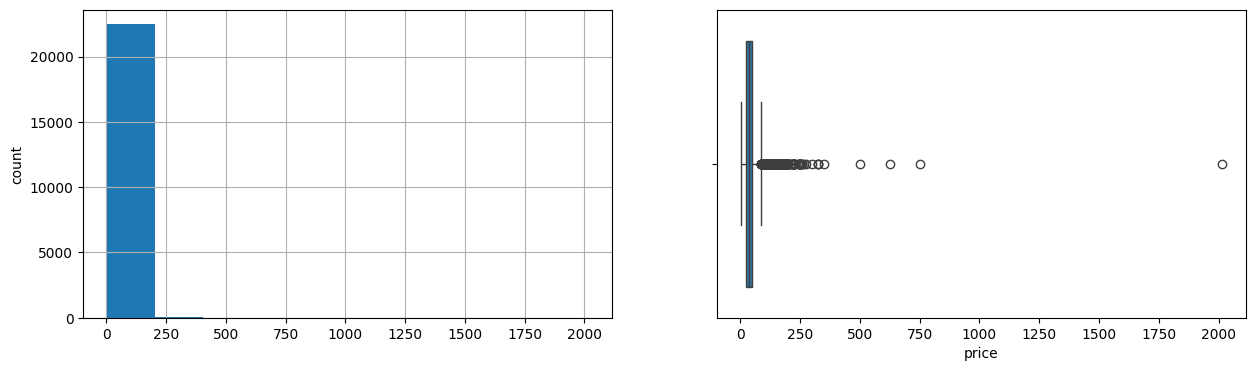

<Figure size 640x480 with 0 Axes>

In [6]:
# Filter out the numerical columns and categorical columns.
cat_cols = wines_df.select_dtypes(include=['object']).columns
numerical_cols = wines_df.select_dtypes(include=np.number).columns

for cols in numerical_cols:
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    wines_df[cols].hist(grid=True,bins=10)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=wines_df[cols])
    plt.show()
    plt.clf()

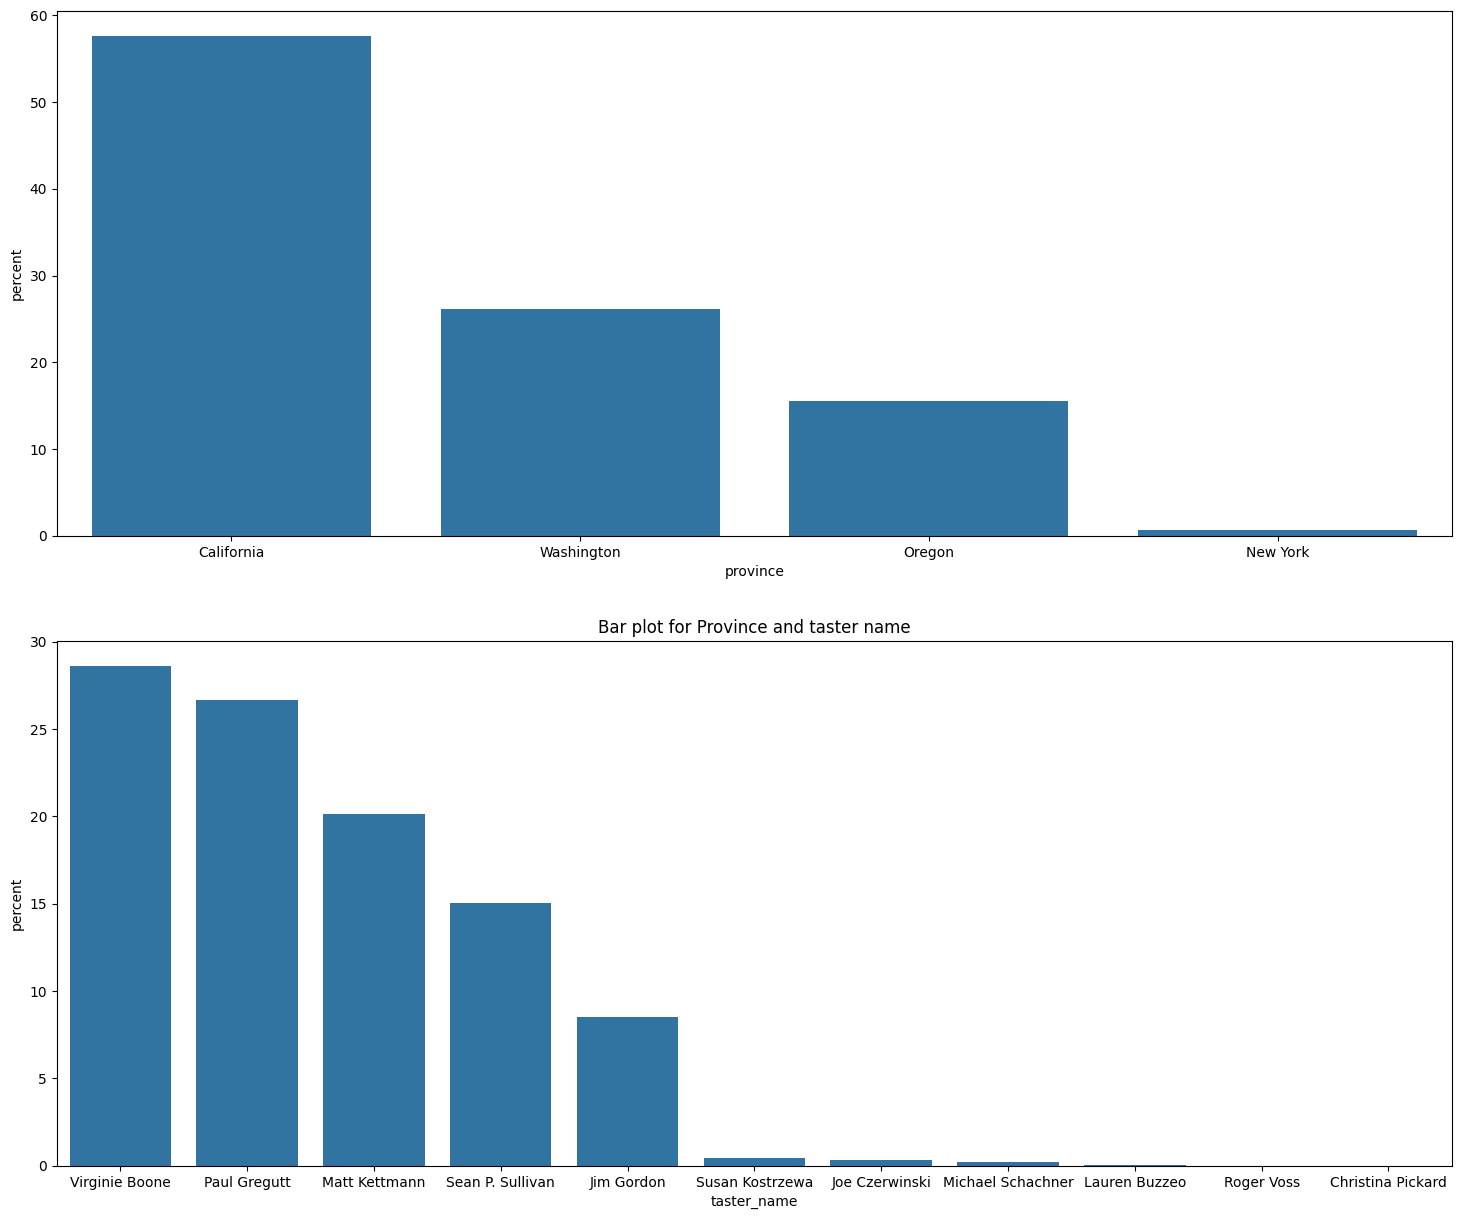

<Figure size 640x480 with 0 Axes>

In [52]:
# Categorical variables count plot.

fig,axes = plt.subplots(2,1,figsize=(18,15))

sns.countplot(ax=axes[0],data=wines_df,x='province',order=wines_df['province'].value_counts().index,stat='percent')
sns.countplot(ax=axes[1],data=wines_df,x='taster_name',order=wines_df['taster_name'].value_counts().index,stat='percent')
plt.title("Bar plot for Province and taster name")
plt.show()
plt.clf()

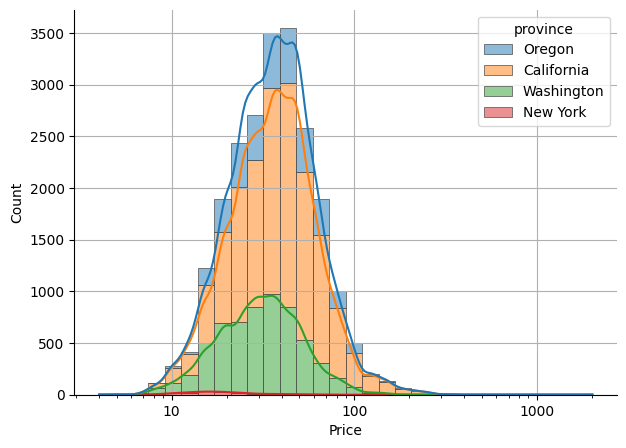

<Figure size 640x480 with 0 Axes>

In [56]:
# Created a stacked plot of price count based on province. Transofrmed the data to log for better distribution.

fig,ax = plt.subplots(figsize=(7,5))
sns.despine(fig)
sns.histplot(data=wines_df,x='price',hue='province',multiple='stack',bins=30,kde=True,edgecolor=".3",linewidth=0.5,log_scale=True)
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set(xlabel="Price")
plt.show()
plt.clf()


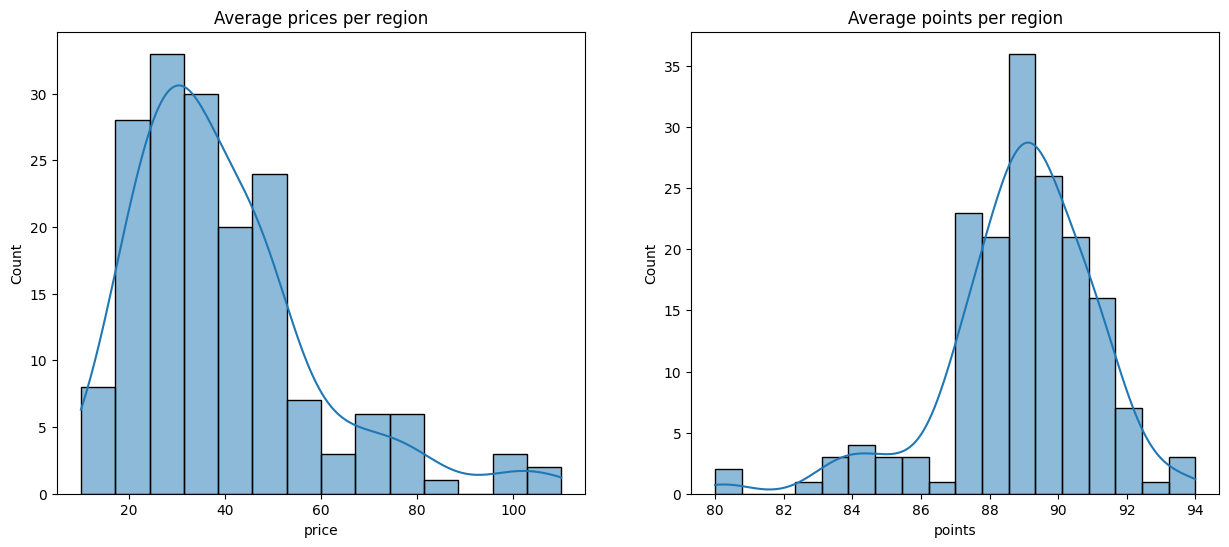

<Figure size 640x480 with 0 Axes>

In [31]:
# Group price based on region.

avg_based_region = wines_df.groupby('region_1')[['price','points']].mean().reset_index()
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.histplot(ax=ax[0],data=avg_based_region,x='price',stat='count',kde=True)
sns.histplot(ax=ax[1],data=avg_based_region,x='points',stat='count',kde=True)
ax[0].title.set_text('Average prices per region')
ax[1].title.set_text('Average points per region')
plt.show()
plt.clf()

In [10]:
# Analyse data between points and price.

cov = np.cov(wines_df['price'],wines_df['points'])
print(f"Cov = {cov[1][0]}")
pearsonr_corr,_ = ss.pearsonr(x=wines_df['price'],y=wines_df['points'])
print(f"Correlation = {pearsonr_corr}")

# calculate spearman's correlation

spearman_corr, _ = ss.spearmanr(wines_df['price'], wines_df['points'])
print('Spearmans correlation: {:.3f}'.format(spearman_corr))

# plt.figure(figsize=(10,6))
# sns.scatterplot(data=wines_df,x=wines_df['price'],y=wines_df['points'])
# plt.show()
# plt.clf()

Cov = 32.407540438803245
Correlation = 0.39406995123945554
Spearmans correlation: 0.519


In [11]:
# Analyse data between province/winery and price.

winery_grp = wines_df.groupby(['province','winery'])
data = winery_grp[['price','points']].transform(lambda x: np.mean(x))


# Analyse average data between points and price.

cov = np.cov(data['price'],data['points'])
print(f"Cov = {cov[1][0]}")
pearsonr_corr,_ = ss.pearsonr(x=data['price'],y=data['points'])
print(f"Pearson Correlation = {pearsonr_corr}")

# calculate spearman's correlation

spearman_corr, _ = ss.spearmanr(data['price'], data['points'])
print('Spearmans correlation: {:.3f}'.format(spearman_corr))


Cov = 24.486221927253908
Pearson Correlation = 0.5562124810541373
Spearmans correlation: 0.661


In [12]:
mean_by_province = wines_df.groupby('province')['price'].mean()
stdev_by_province = wines_df.groupby('province')['price'].std()


sample_mean = np.mean(wines_df['price'])

z_score = (sample_mean - sum(mean_by_province)/len(mean_by_province))/(sum(stdev_by_province**2)/len(stdev_by_province**2))
prob = 1 - ss.norm.cdf(z_score)
print(z_score,prob)

0.011954409456102327 0.4952309942191051


In [13]:
# Calculate a new column which shows rating in a scale of 0-10

get_points = np.array(wines_df['points'].values,dtype=np.float32)
dictionary = {}
def num_to_range(num, inMin, inMax, outMin, outMax):
    for points in num:
        formula = outMin + float(points - inMin) / float(inMax - inMin) * (outMax- outMin)
        dictionary.setdefault("scaled_points",[]).append(formula)
    return dictionary    

scaled_points = pd.DataFrame(num_to_range(get_points,min(get_points),max(get_points),0,10))
wines_df = wines_df.assign(**scaled_points)

wines_df['scaled_points'].head(10)


4     3.0
10    3.0
23    3.5
25    5.5
35    5.5
60    4.5
62    4.5
64    4.5
67    6.0
71    3.5
Name: scaled_points, dtype: float64